TIR file 'car235_50R24.tir' successfully loaded.
Validation of TIR file successful. All parameters found for version MF6.2
Unloaded radius = 0.422 m


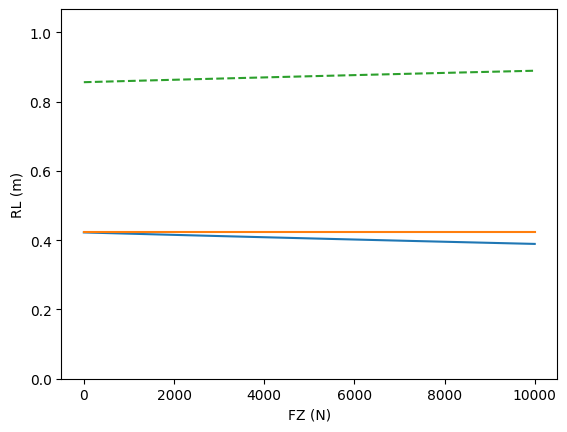

In [16]:
from src.models.tyre.initialize_tyre import Tyre
import numpy as np
import matplotlib.pyplot as plt

# all tyre data from car205_60R19.tir
current_tyre = Tyre("car235_50R24.tir", validate=True)
# tyre properties
CZ0 = current_tyre.VERTICAL_STIFFNESS
FZ0 = current_tyre.FNOMIN
P0  = current_tyre.NOMPRES
R0  = current_tyre.UNLOADED_RADIUS
V0  = current_tyre.LONGVL

# tyre params
Q_V2  = current_tyre.Q_V2
Q_FZ2 = current_tyre.Q_FZ2
PFZ1  = current_tyre.PFZ1
Q_FCX = current_tyre.Q_FCX
Q_FCY = current_tyre.Q_FCY

# find QFZ1 from CZ0 (A3.4)
Q_FZ1 = np.sqrt((CZ0 * R0 / FZ0) ** 2 - 4 * Q_FZ2)

# state sweep
IA = 0.0
FX = 0.0
FY = 0.0
FZ = np.linspace(0, current_tyre.FZMAX, 101)
P  = current_tyre.INFLPRES
N  = 0.0

# normalize pressure
dpi = (P - P0) / P0

# inputs affecting the radius (A3.3)
speed_effect    = Q_V2 * np.abs(N) * R0 / V0
fx_effect       = (Q_FCX * FX / FZ0) ** 2
fy_effect       = (Q_FCY * FY / FZ0) ** 2
pressure_effect = (1.0 + PFZ1 * dpi) * FZ0
external_effect = (1.0 + speed_effect - fx_effect - fy_effect) * pressure_effect

# solve via the ABC formula
A = - Q_FZ2 / (R0 ** 2)
B = - Q_FZ1 / R0
C = FZ / ((1.0 + speed_effect - fx_effect - fy_effect) * pressure_effect)
rho_1 = (- B + np.sqrt(B ** 2 - 4 * A * C)) / (2 * A)
rho_2 = (- B - np.sqrt(B ** 2 - 4 * A * C)) / (2 * A) # TODO: figure out which is best
print(f"Unloaded radius = {R0:.3f} m")
RL = R0 - rho_2

# plot results
plt.plot(FZ, RL)
plt.plot(FZ, R0 * np.ones_like(RL))
plt.plot(FZ, R0 - rho_1, linestyle='--')
plt.xlabel("FZ (N)")
plt.ylabel("RL (m)")
plt.ylim([0, 1.2*max(np.max(RL), np.max(R0 - rho_1))])
plt.show()